# Análise exploratória dos Microdados do ENEM

O objetivos deste notebook é fazer uma análise exploratória dos dados do ENEM de 2020, fazer algumas perguntas e questionamentos e fazer obervações sobre a prova.<br/>
Os dados foram obtidos no site do próprio governo brasileiro. Link: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Setando o tamanho padrão dos gráficos
sns.set(rc={'figure.figsize':(12,8)})

In [2]:
dadosEnem = pd.read_csv('dados_brutos/DADOS/MICRODADOS_ENEM_2020.csv', sep=';', encoding = 'ISO-8859-1')

In [3]:
dadosEnem.shape

(5783109, 76)

In [4]:
dadosEnem.head(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


In [5]:
dadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

De acordo com a descrição no arquivo DICIONÁRIO/Dicionário_Microdados_Enem_2020 temos:
* __Dados do participante:__ 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO'
* __Dados da escola:__ 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC'
* __Dados do local da aplicação da prova:__  'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA'
* __Dados da prova objetiva:__ 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT'
* __Dados da redação:__ 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'
* __dados do questionário socioeconômico:__ 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'

__Teremos uma grande dificuldade com esses dados__
O conjunto de dados é extremamente grande, com isso, basicamente qualquer consulta e operação vai demorar vários segundos. A melhor alternativa é reduzir o tamanho do dataframe selecionando somente as colunas/atributos relevantes para cada análise.

In [6]:
dadosEnem.isnull().sum()

NU_INSCRICAO           0
NU_ANO                 0
TP_FAIXA_ETARIA        0
TP_SEXO                0
TP_ESTADO_CIVIL        0
                   ...  
Q021               95966
Q022               95966
Q023               95966
Q024               95966
Q025               95966
Length: 76, dtype: int64

In [7]:
colunasSelecionadas1 = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']

dfSelecionados1 = dadosEnem.filter(items=colunasSelecionadas1)

#### Análise por dados do participante

Como primeira análise, vamos olhar pela própria divisão do dicionário disponibilizado pelo governo. Vamos selecionar somente as colunas pertinentes para otimizar a performance do modelo.

In [8]:
colSelecionados1 = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO']

dfParticipantes = dadosEnem.filter(items=colSelecionados1)

In [9]:
dfParticipantes.shape

(5783109, 11)

In [10]:
#Verificando se há dados duplicados, como não há podemos exluir a coluna NU_INSCRICAO
dfParticipantes[dfParticipantes.duplicated(['NU_INSCRICAO'],keep=False)]

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO


In [11]:
dfParticipantes.drop('NU_INSCRICAO', axis=1)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO
0,11,F,1,2,1,1,11,1,NaN,0
1,11,M,2,3,1,1,11,1,NaN,0
2,4,F,2,3,2,2,0,2,1.0,0
3,2,M,1,3,1,2,0,2,1.0,0
4,4,F,1,3,2,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...
5783104,2,F,1,1,1,2,0,2,1.0,0
5783105,3,M,1,1,1,2,0,2,1.0,0
5783106,3,F,1,1,1,1,1,1,NaN,0
5783107,4,F,1,1,1,2,0,3,1.0,0


##### GÊNERO
A maioria dos participantes é do sexo feminino, esse gênero representa quase 60% dos participantes.

In [12]:
dfParticipantes['TP_SEXO'].isnull().sum()

0

In [13]:
totalParticipantes = dfParticipantes.shape[0]

In [14]:
print(dfParticipantes['TP_SEXO'].value_counts())
for i in dfParticipantes['TP_SEXO'].value_counts():
    print('{0:.2f}%'.format(i  * 100 / totalParticipantes))

F    3468805
M    2314304
Name: TP_SEXO, dtype: int64
59.98%
40.02%


Quase 60% dos participantes da provam foram do sexo feminino.

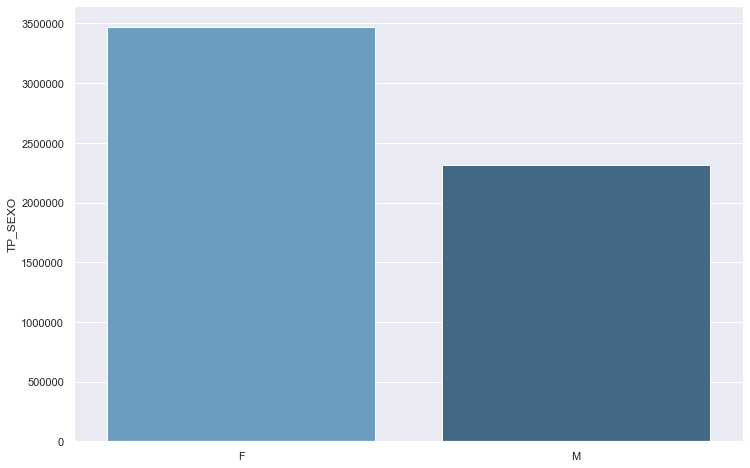

In [15]:
plt.ticklabel_format(style='plain', axis='y')
sns.set(rc={'figure.figsize':(4,4)})
dfSex = dfParticipantes['TP_SEXO'].value_counts()
ax = sns.barplot(y=dfParticipantes['TP_SEXO'].value_counts(), x=dfSex.index, data=dfParticipantes, palette="Blues_d")

#### FAIXA ETÁRIA
No atributo faixa etária até o valor 10 (exceto 0) corresponde a valores únicos, por exemplo: 
* 1 = 17 anos;
* 2 = 18 anos;
* 3 = 29 anos;
* etc..
O valor 0 (zero) corresponde ao intervalo de idades menores que 17 anos, assim como a partir do valor 11 que também correspondem a intervalos de valoes:
* 11 = Entre 26 a 30 anos;
* 12 = Entre 31 a 35 anos;
* 13 = Entre 36 a 40 anos;
* Etc..
<br/>
Isso dificulta uma análise mais precisa. <br/>
Após pegar somente os valores únicos e exibir o histograma, podemos observar que a distribuição não é normal. E faz sentido, pois de maneira geral, as pessoas que fazem a prova do ENEM são estudantes que recém se formaram no ensino médio e vão fazer a prova para tentarem ingressar no ensino superior.

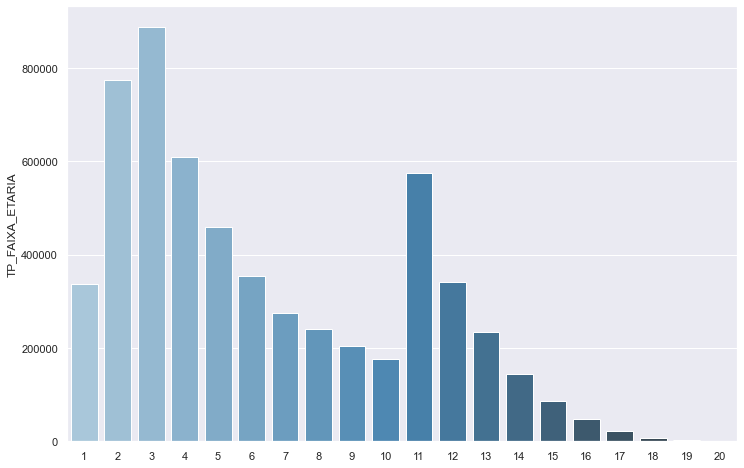

In [16]:
sns.set(rc={'figure.figsize':(12,8)})
dfEtaria = dfParticipantes['TP_FAIXA_ETARIA'].value_counts()
ax = sns.barplot(y=dfParticipantes['TP_FAIXA_ETARIA'].value_counts(), x=dfEtaria.index, data=dfParticipantes, palette="Blues_d")

C:\Users\krupc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TP_FAIXA_ETARIA'>

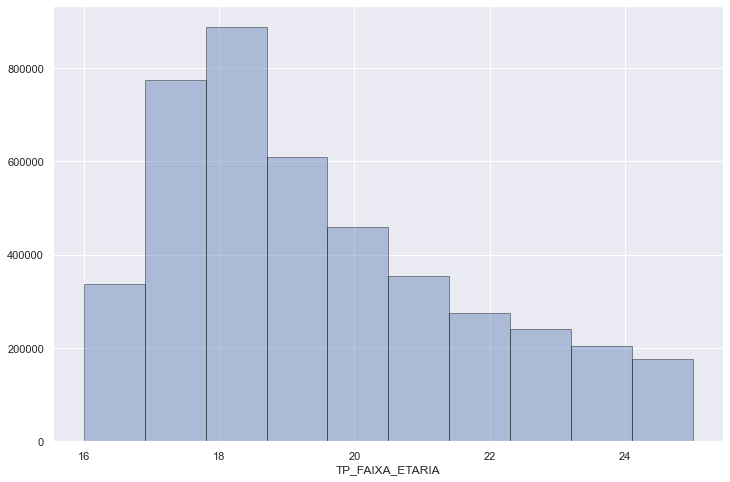

In [17]:
agrupado = dfParticipantes.loc[dfParticipantes.TP_FAIXA_ETARIA <= 10, 'TP_FAIXA_ETARIA']
map_idade = {
    1: 16, 2: 17, 3: 18, 4: 19, 5: 20, 6: 21, 7: 22, 8: 23, 9: 24, 10: 25
}

agrupado = agrupado.map(map_idade)
sns.distplot(agrupado, hist=True, bins=10, kde=False, hist_kws={'edgecolor': 'black'})

#### COR RAÇA
É possível notar que a grande maioria dos participantes está entre PARDO e BRANCO. De acordo com o IBGE a população esta é a população atual dividida por raça:
<img src="https://educa.ibge.gov.br/images/cor_ou_raca_-_populacao_por_cor_ou_raca.png">
<br/>
Analisando por essa tabela e pelo gráfico abaixo, a quantidade de participantes da prova por raça têm uma certa proporcionalidade.

In [18]:
map_raca = {
    0 : 'Não declarado',
    1 : 'Branca',
    2 : 'Preta',
    3 : 'Parda',
    4 : 'Amarela',
    5 : 'Indígena',
}
dfParticipantes['TP_COR_RACA'] = dfParticipantes['TP_COR_RACA'].map(map_raca)

In [19]:
dfRaca = dfParticipantes['TP_COR_RACA'].value_counts()

In [20]:
dfRaca.index

Index(['Parda', 'Branca', 'Preta', 'Amarela', 'Não declarado', 'Indígena'], dtype='object')

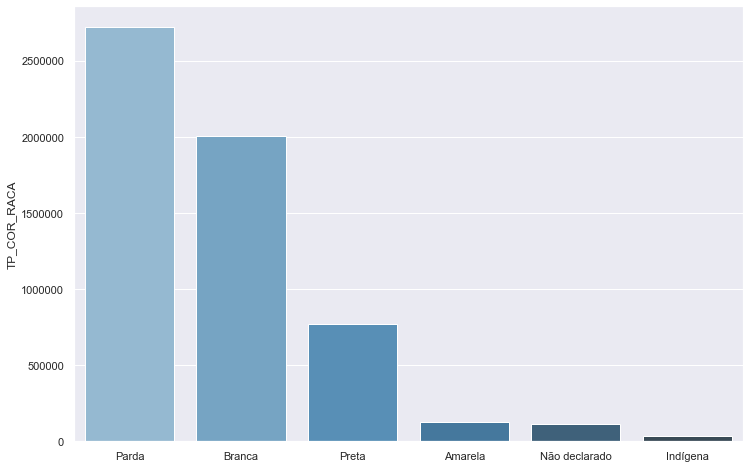

In [21]:
plt.ticklabel_format(style='plain', axis='y')
ax = sns.barplot(y=dfParticipantes['TP_COR_RACA'].value_counts(), x=dfRaca.index, data=dfParticipantes, palette="Blues_d")

#### ESTADO CIVIL
Essa é uma informação com baixa confiabilidade, pois a quantidade de estado civil com o valor não informado é muito alta, está em terceiro no ranking.

In [22]:
map_estadoCivil = {
    0 : 'Não informado',
    1 : 'Solteiro(a)',
    2 : 'Casado(a)/Mora com o companheiro(a)',
    3 : 'Divorciado(a)/Desquitado(a)/Separado(a)',
    4 : 'Viúvo(a)'
}
dfParticipantes['TP_ESTADO_CIVIL'] = dfParticipantes['TP_ESTADO_CIVIL'].map(map_estadoCivil)

dfEstadoCivil = dfParticipantes['TP_ESTADO_CIVIL'].value_counts()

In [23]:
dfEstadoCivil

Solteiro(a)                                4851310
Casado(a)/Mora com o companheiro(a)         527734
Não informado                               263848
Divorciado(a)/Desquitado(a)/Separado(a)     131423
Viúvo(a)                                      8794
Name: TP_ESTADO_CIVIL, dtype: int64

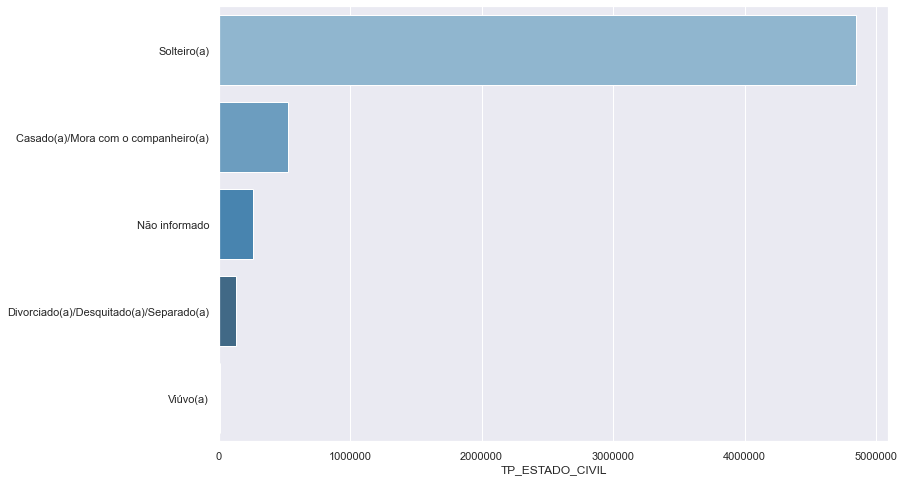

In [24]:
plt.ticklabel_format(style='plain', axis='x')
ax = sns.barplot(x=dfEstadoCivil, y=dfEstadoCivil.index, data=dfParticipantes, palette="Blues_d")

#### ANO DE CONCLUSÃO DO ENSINO MÉDIO
Em termos gerais, a maioria dos participantes do ENEM já concluiram o Ensino médio.

In [25]:
map_conclusaoEM = {
    0: 'Não informado',
    1: '2019',
    2: '2018',
    3: '2017',
    4: '2016',
    5: '2015',
    6: '2014',
    7: '2013',
    8: '2012',
    9: '2011',
    10: '2010',
    11: '2009',
    12: '2008',
    13: '2007',
    14: 'Antes de 2007'
}

dfParticipantes['TP_ANO_CONCLUIU'] = dfParticipantes['TP_ANO_CONCLUIU'].map(map_conclusaoEM)

In [26]:
dfConclusaoEM = dfParticipantes['TP_ANO_CONCLUIU'].value_counts()

In [27]:
dfConclusaoEM

Não informado    2524990
2019              646471
Antes de 2007     487510
2018              437387
2017              338872
2016              252946
2015              211802
2014              176866
2013              147981
2012              129561
2011              104847
2010               98218
2009               86531
2008               71876
2007               67251
Name: TP_ANO_CONCLUIU, dtype: int64

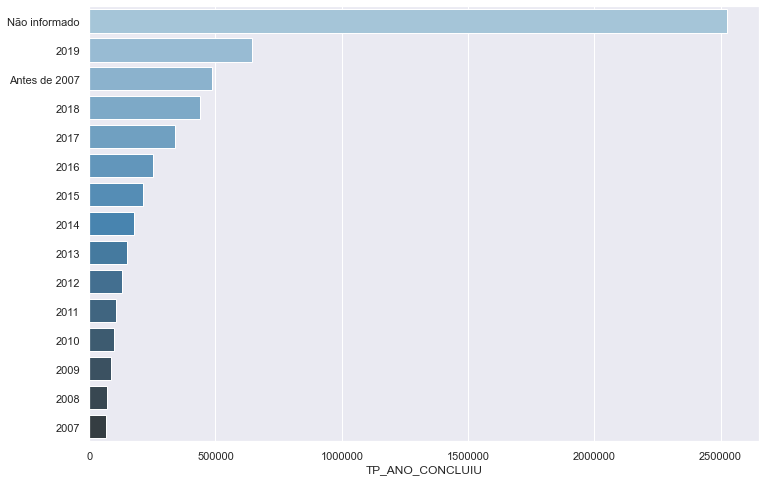

In [28]:
plt.ticklabel_format(style='plain', axis='x')
ax = sns.barplot(x=dfConclusaoEM, y=dfConclusaoEM.index, data=dfParticipantes, palette="Blues_d")

In [29]:
map_situacaoEM = {
    1: 'Já concluí o Ensino Médio',
    2: 'Estou cursando e concluirei o Ensino Médio em 2020',
    3: 'Estou cursando e concluirei o Ensino Médio após 2020',
    4: 'Não concluí e não estou cursando o Ensino Médio'
}

dfParticipantes['TP_ST_CONCLUSAO'] = dfParticipantes['TP_ST_CONCLUSAO'].map(map_situacaoEM)
dfSituacaoEM = dfParticipantes['TP_ST_CONCLUSAO'].value_counts()

In [30]:
dfSituacaoEM

Já concluí o Ensino Médio                               3794279
Estou cursando e concluirei o Ensino Médio em 2020      1395827
Estou cursando e concluirei o Ensino Médio após 2020     557425
Não concluí e não estou cursando o Ensino Médio           35578
Name: TP_ST_CONCLUSAO, dtype: int64

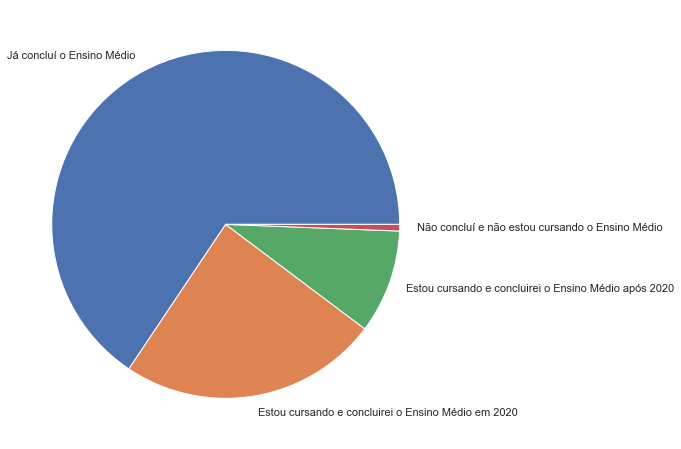

In [31]:
plt.pie(dfParticipantes['TP_ST_CONCLUSAO'].value_counts(), labels = dfSituacaoEM.index)
plt.show()

#### TIPO DA ESCOLA DO ENSINO MÉDIO

In [32]:
map_tpEscola = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada',
    4: 'Exterior'
}

dfParticipantes['TP_ESCOLA'] = dfParticipantes['TP_ESCOLA'].map(map_tpEscola)
dfTpEscola = dfParticipantes['TP_ESCOLA'].value_counts()

In [33]:
dfTpEscola

Não Respondeu    4387282
Pública          1194496
Privada           201331
Name: TP_ESCOLA, dtype: int64